In [3]:
from scipy.stats import f_oneway, normaltest, levene
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display, HTML
import statsmodels.formula.api as smf

sns.set_theme(style="ticks", palette="pastel")

# Part I - Rubisco transgene experiment

## Sucrose

,Sucrose,treatment
0,5.68,wt
1,7.10,wt
2,5.01,wt
3,3.57,wt
4,3.78,wt
5,5.63,wt
6,6.63,wt
7,3.76,wt
8,5.65,wt
9,5.63,wt


Text(0, 0.5, 'Sucrose Concentration ($\\mu$mol/g)')

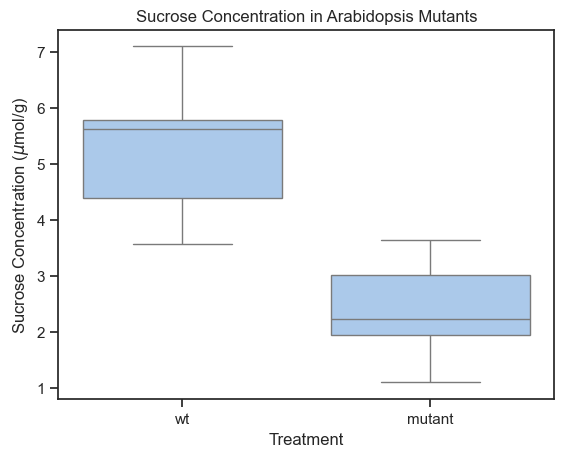

In [4]:
sucrose_data = pd.read_csv("data/Sucrose.csv") # read the data from the csv file
display(sucrose_data)
# create the boxplot
ax = sns.boxplot(x="treatment", y="Sucrose", data=sucrose_data)
ax.set_title("Sucrose Concentration in Arabidopsis Mutants")
ax.set_xlabel("Treatment")
ax.set_ylabel("Sucrose Concentration ($\\mu$mol/g)")

In order to do a one-way ANOVA, we should test that the data collected fits the assumptions of the test. The assumptions of a one-way ANOVA are:

- The samples are independent.
- Each sample is from a normally distributed population. This can be tested using a SciPy's `normaltest` (It is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).
- The SD of each group is the same (homogeneity of variance). This can be tested using the Levene's test.

Using the `normaltest` function:

In [5]:
# test if the distributions of each population is normally distributed

print(normaltest(sucrose_data[sucrose_data["treatment"] == "wt"]["Sucrose"]))
print(normaltest(sucrose_data[sucrose_data["treatment"] == "mutant"]["Sucrose"]))

NormaltestResult(statistic=0.5832213517389794, pvalue=0.7470593275867403)
NormaltestResult(statistic=0.6009762314553877, pvalue=0.7404567038950335)


/Users/th/.pyenv/versions/3.12.0/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


This returns a high p-value, meaning that the probability of this data being normally distributed is high.

Using the Levene's test to test for homogeneity of variance:

In [6]:
print(levene(sucrose_data[sucrose_data["treatment"] == "wt"]["Sucrose"], sucrose_data[sucrose_data["treatment"] == "mutant"]["Sucrose"]))

LeveneResult(statistic=0.35140479282257187, pvalue=0.5599628035141764)


The high p-value means that the probability of this data having the same variance is high.

With these two assumptions verified we are able to do a one-way ANOVA.

In [7]:
(sucrose_f := f_oneway(sucrose_data[sucrose_data["treatment"] == "wt"]["Sucrose"], sucrose_data[sucrose_data["treatment"] == "mutant"]["Sucrose"]))

F_onewayResult(statistic=44.590599436650116, pvalue=1.6849610967522526e-06)

> We were able to conclude that there was a difference in sucrose concentration between the wild type treatment and mutant treatment based on a one-way ANOVA ($F_{df=2,19}= 44.59, p<0.0001$)

## ACi

In [8]:
aci_df = pd.read_csv("data/stackedACi.csv")
display(aci_df)

,Treatment,Ci,A,x
0,wt,73.296105,-0.012118,0.067692
1,wt,116.519247,1.767882,0.137241
2,wt,147.280515,2.779511,0.180736
3,wt,184.439371,4.480535,0.227764
4,wt,235.531784,5.727014,0.284256
5,wt,286.786454,7.199071,0.333190
6,mutant,76.139613,-0.976707,0.072611
7,mutant,154.959330,-0.279311,0.190918
8,mutant,201.514984,-0.179819,0.247611
9,mutant,255.052613,0.280199,0.303716


Text(0, 0.5, 'Photosynthetic Activity ($\\mu mol CO_2 m^{-2}s^{-1}$)')

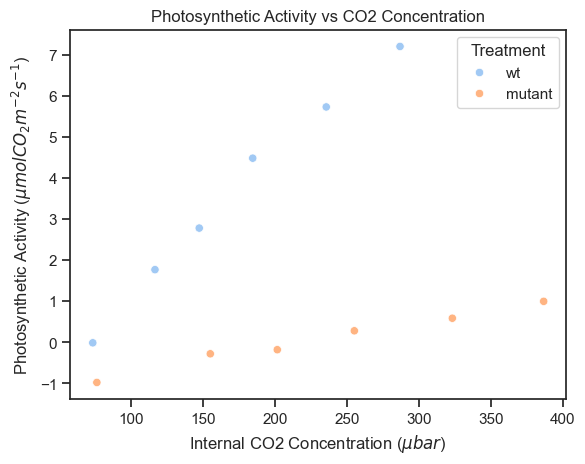

In [9]:
ax = sns.scatterplot(data=aci_df, x="Ci", y="A", hue="Treatment")
ax.set_title("Photosynthetic Activity vs CO2 Concentration")
ax.set_xlabel("Internal CO2 Concentration ($\\mu bar$)")
ax.set_ylabel("Photosynthetic Activity ($\\mu mol CO_2 m^{-2}s^{-1}$)")

Text(0, 0.5, 'Photosynthetic Activity ($\\mu mol CO_2 m^{-2}s^{-1}$)')

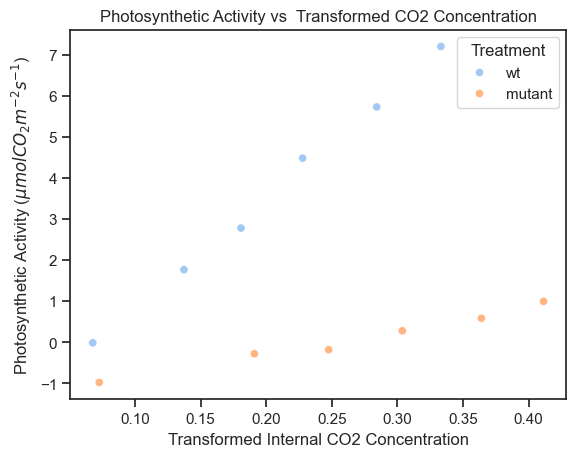

In [10]:
ax = sns.scatterplot(data=aci_df, x="x", y="A", hue="Treatment")
ax.set_title("Photosynthetic Activity vs  Transformed CO2 Concentration")
ax.set_xlabel("Transformed Internal CO2 Concentration")
ax.set_ylabel("Photosynthetic Activity ($\\mu mol CO_2 m^{-2}s^{-1}$)")

In [11]:
# run levene's test on the transformed data
print(levene(aci_df[aci_df["Treatment"] == "wt"]["x"], aci_df[aci_df["Treatment"] == "mutant"]["x"]))

LeveneResult(statistic=0.28469435872023646, pvalue=0.6052965796161142)


The above shows that the levene test is not significant, meaning that the variance is the same between the two groups. 

Both datasets apear linear, however will now generate a model and test whether and how the response of photosynthetic activity to CO2
concentration is affected by the transgene.

In [12]:
# create the predictors and response variables
aci_predictor = aci_df[["x", "Treatment"]]
aci_response = aci_df[["A"]]
# aci_predictor = pd.get_dummies(aci_predictor, drop_first=True) # create the dummy variables

# aci_predictor = smf.add_constant(aci_predictor) # add the constant term

display(aci_predictor)

,x,Treatment
0,0.067692,wt
1,0.137241,wt
2,0.180736,wt
3,0.227764,wt
4,0.284256,wt
5,0.333190,wt
6,0.072611,mutant
7,0.190918,mutant
8,0.247611,mutant
9,0.303716,mutant


In [13]:
# fit the linear model
aci_linear_model = smf.ols(formula="A ~  x*C(Treatment)", data=aci_df).fit()

/Users/th/.pyenv/versions/3.12.0/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      A   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1386.
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           3.34e-11
Time:                        16:27:42   Log-Likelihood:                 9.4037
No. Observations:                  12   AIC:                            -10.81
Df Residuals:                       8   BIC:                            -8.868
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.4251      0.142    -10.056      0.000      -1.752      -1.098
C(Treatment)[T.wt]      -0.5167      0.199     -2.601      0.032      -0.975      -0.059
x                        5.6451      0.492     11.466      0.000       4.510       6.780
x:C(Treatment)[T.wt]    21.6466      0.794     27.272      0.000      19.816      23.477
==============================================================================
Omnibus:                        0.184   Durbin-Watson:                   2.842
Prob(Omnibus):                  0.912   Jarque-Bera (JB):                0.167
Skew:                          -0.187   Prob(JB):                        0.920
Kurtosis:                       2.559   Cond. No.                         26.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3.521734306130354e-09


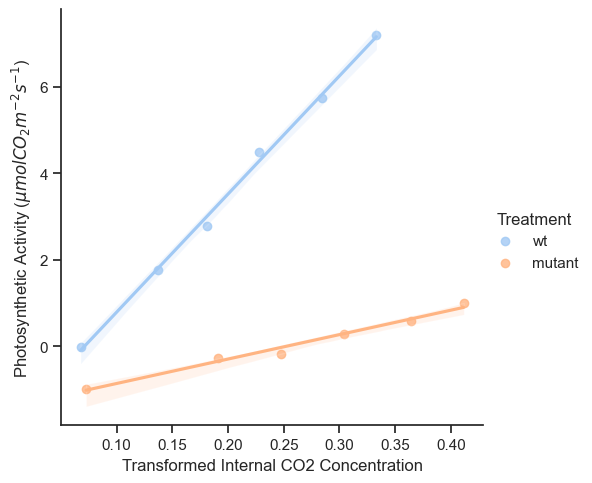

In [14]:
display(aci_linear_model.summary())

# print the p values for the interaction terms
print(aci_linear_model.pvalues["x:C(Treatment)[T.wt]"])

ax = sns.lmplot(data=aci_df, x="x", y="A", hue="Treatment")
ax.set_axis_labels("Transformed Internal CO2 Concentration", "Photosynthetic Activity ($\\mu mol CO_2 m^{-2}s^{-1}$)")


From this data table, the p-value for the interaction term is p>0.001 therefore we cannot drop the interaction term.

From the table we can see:

- The intercept (mutant without wt) is -1.42,
- The slope is normally 5.645 for the mutant
- The wt leads to a decrease of intercept by -0.51
- The wt leads to an increase in slope of 21.64

This means the equation for the mutant is: $A = -1.42 + 5.645x$ and the equation for the wt is: $y = -1.93 + 27.285x$.

From the above, we can see that the Rd (the negative intercept), the positive is the the rate of CO2 release from mitochondrial respiration, is $1.42 \ \mu\ mol\ CO_2\ m^{-2}s^{-1}$ in the mutant line and $1.93 \ \mu\ mol\ CO_2\ m^{-2}s^{-1}$ in the wild type.

We can see that the maximum rate of RuBP carboxylation (Vcmax, which is the gradient) is dependent on the treatment. For the mutant, Vcmax is $21.6 \ \mu\ mol\ CO_2\ m^{-2}s^{-1}$, and for the wild type, Vcmax is $27.2 \ \mu\ mol\ CO_2\ m^{-2}s^{-1}$.

Summarising in a statement that could be found in a paper:

> The mutant line had a lower rate of CO2 release from mitochondrial respiration ($1.42 \ \mu\ mol\ CO_2\ m^{-2}s^{-1}$) than the wild type ($1.93 \ \mu\ mol\ CO_2\ m^{-2}s^{-1}$). The maximum rate of RuBP carboxylation (Vcmax) was higher in the wild type ($27.2 \ \mu\ mol\ CO_2\ m^{-2}s^{-1}$) than the mutant ($21.6 \ \mu\ mol\ CO_2\ m^{-2}s^{-1}$) (OLS regression ANOVA, $F_{df=3,8}= 1386, p<0.0001$).

# Part II - Past Part IB examination question

a) What is being done in the analyses?

> You are testing to see if it is possible to generate a linear model that generates the predicted yield based on the treatment (virus) type the plant is exposed to. You are then showing a summary, which shows the intercept (virus cc), and the effect that the three other viruses have relative to this; it is also showing the p-value for the model, which is significant, meaning that the model is a good fit for the data. This is followed by the ANOVA which shows the F test completed to gain the p-value stated in the summary. The last line shows the effect on the p-value.
> There is also a difference between the two analyses is that the first analysis set is done on the raw data, whereas the second analysis is done on the log transformed data.

b) Which of the two analyses do you think is most appropriate, and why?

> From the diagnostic plots, although  the normalQ-Q plot has a small tail on the end off the 1:1 (point 1), the fit to the normal Q-Q graph is much better on the log modified data. Also, the data is much more evenly spread on the residual vs fitted plot. Therefore, I think that the log modified data is more appropriate. This is confirmed by the lower p-value for the log modified data.

c) What can be concluded from your preferred analysis?

> Compared to the control (oo) treatment, all three treatments affected the plant, however the feathery mottle virus treatment (ff) affected the log(yeild) of the plant the least, followed by the chlorotic dwarf treatment (cc), with the most effect coming from the combined treatments (fc). This is tested with the ANOVA test which resulted in a p-value of approximately 0.00015, which is significant, meaning that the model is a good fit for the data ($F_{df=3,8}= 26.4$).

d) Write a sentence or two – in the style of the results section of a scientific publication – showing how the analysis could be reported.

> The yield of sweetpotato was significantly affected by the virus treatments ($F_{df=3,8}= 26.4, p<0.0005$). The feathery mottle virus treatment (ff) affected the log(yeild) of the plant the least, followed by the chlorotic dwarf treatment (cc), with the most effect coming from the combined treatments (fc).

e) Estimate the total yield of sweetpotato in each of the three plots containing:
   


part i) sweetpotato with chlorotic dwarf virus (i.e. the treatment cc);

> From the model, the fitted value was 1.38..., and using residuals vs fitted plot, at around a fitted value of 1.38, the three plots had residuals of 0.075, -0.025 and -0.05. Therefore the three plots yield (kg) can be calculated:

In [15]:
np.power(10, 1.38+np.array([0.075, -0.025, -0.05]))


array([28.51018268, 22.64644308, 21.3796209 ])



part ii) doubly-infected sweetpotato plants (i.e. the treatment fc).

> Using a similar method, with the fitted value for fc being 1.38-0.27 = 1.11, the three plots had residuals of 0.07, 0.01 and -0.08. Therefore the three plots yield (kg) can be calculated:

In [16]:
np.power(10, 1.38-0.27+np.array([0.07, -0.01, -0.08]))

array([15.13561248, 12.58925412, 10.71519305])